In [1]:
import torch

In [13]:
x = torch.empty(1) # scalar
print(x)

x = torch.empty(2, 3)
print(x)

x = torch.rand(2, 2) # random value
print(x)

x = torch.zeros(2, 2) # 0 행렬
print(x)

x = torch.ones(2, 2)
print(x)

print(x.dtype)

x = torch.ones(2, 2, dtype=torch.double)
print(x.dtype)

print(x.size()) # size

x = torch.tensor([2.5, 0.1])
print(x)

tensor([0.])
tensor([[0.0000, 1.8750, 0.0000],
        [1.8750, 0.0000, 1.8750]])
tensor([[0.4660, 0.6340],
        [0.6902, 0.8038]])
tensor([[0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.]])
torch.float32
torch.float64
torch.Size([2, 2])
tensor([2.5000, 0.1000])


In [14]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)
print(x, y)

z = x + y # element-wise addition
z = torch.add(x, y)

y.add_(x) # replace y

z = x - y
z = torch.sub(x, y)

z = x * y
z = torch.mul(x, y)
z = torch.div(x, y)

tensor([[0.3574, 0.3255],
        [0.8211, 0.5588]]) tensor([[0.2632, 0.0494],
        [0.7208, 0.8840]])


In [18]:
x = torch.rand(5, 3)
print(x)
print(x[:, 0])
print(x[0, :])
print(x[1, 1].item()) # get actual value

tensor([[0.2284, 0.1543, 0.6603],
        [0.8776, 0.6959, 0.7093],
        [0.7571, 0.2065, 0.4137],
        [0.3234, 0.5165, 0.3466],
        [0.2644, 0.0262, 0.1286]])
tensor([0.2284, 0.8776, 0.7571, 0.3234, 0.2644])
tensor([0.2284, 0.1543, 0.6603])
0.6958613395690918


In [20]:
x = torch.rand(4, 4)
print(x)

y = x.view(16) # reshape
z = x.view(-1, 8) # 2 * 8
print(y)
print(z)

tensor([[0.2425, 0.7683, 0.1925, 0.9926],
        [0.5365, 0.2960, 0.6009, 0.6667],
        [0.6705, 0.5172, 0.8612, 0.8960],
        [0.1927, 0.8660, 0.1145, 0.0247]])
tensor([0.2425, 0.7683, 0.1925, 0.9926, 0.5365, 0.2960, 0.6009, 0.6667, 0.6705,
        0.5172, 0.8612, 0.8960, 0.1927, 0.8660, 0.1145, 0.0247])
tensor([[0.2425, 0.7683, 0.1925, 0.9926, 0.5365, 0.2960, 0.6009, 0.6667],
        [0.6705, 0.5172, 0.8612, 0.8960, 0.1927, 0.8660, 0.1145, 0.0247]])


In [2]:
import numpy as np

a = torch.ones(5)
print(a)
b = a.numpy()  # pointer
print(type(b))

a.add_(1)
print(a)
print(b) ###

a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)

a += 1
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
<class 'numpy.ndarray'>
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]
[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [40]:
# autograd
x = torch.randn(3, requires_grad=True)
print(x)

y = x + 2
print(y) # grad_fn=<AddBackward0>

z = y * y * 2
print(z) # grad_fn=<MulBackward0>

#z = z.mean()
#print(z) # grad_fn=<MeanBackward0>

v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v)  # Jacobian matrix
print(x.grad) # grad is for scalar

tensor([-0.7570,  1.4063,  1.5096], requires_grad=True)
tensor([1.2430, 3.4063, 3.5096], grad_fn=<AddBackward0>)
tensor([ 3.0900, 23.2057, 24.6343], grad_fn=<MulBackward0>)
tensor([ 0.4972, 13.6252,  0.0140])


In [44]:
# tracking stop

x = torch.randn(3, requires_grad=True)
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad()

with torch.no_grad():
    y = x + 2
    print(y)

tensor([2.2328, 2.3579, 2.6878])
tensor([2.2328, 2.3579, 2.6878])


In [48]:
weights = torch.ones(4, requires_grad = True)

for epoch in range(3):
    model_output = (weights * 3).sum()
    
    model_output.backward()
    
    print(weights.grad)
    
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [50]:
# linear regression

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad = True)

# forward pass and compute loss
y_hat = w * x
loss = (y_hat - y) ** 2

print(loss)

# backward pass
loss.backward()
print(w.grad)

### update weights


tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


In [3]:
# design model (input, output size, forward pass)
# construct loss and optimizer
# training loop
#   - forward pass: compute prediction
#   - backward pass: gradients
#   - update weights

import torch.nn as nn

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)
n_samples, n_features = X.shape

X_test = torch.tensor([[5]], dtype=torch.float32)
input_size = n_features  # 1
output_size = n_features  # 1
#model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)

# training
lr = 0.1
n_iters = 50

# loss (MSE)
loss = nn.MSELoss()  # callable function
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_iters):
    y_pred = model(X)
    
    l = loss(Y, y_pred)
    
    # backward pass
    l.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    [w, b] = model.parameters()
    print("epoch", epoch+1, "w", w[0][0].item(), f"loss {l:.8f}")

print(f"prediction after training: f(5) = {model(X_test).item():3f}")

epoch 1 w 2.478407382965088 loss 14.74305916
epoch 2 w 1.0908863544464111 loss 6.71656799
epoch 3 w 2.0382308959960938 loss 3.10708952
epoch 4 w 1.4205451011657715 loss 1.48110580
epoch 5 w 1.8510136604309082 loss 0.74599046
epoch 6 w 1.5786584615707397 loss 0.41115931
epoch 7 w 1.7767564058303833 loss 0.25633037
epoch 8 w 1.659155011177063 loss 0.18258454
epoch 9 w 1.7526381015777588 loss 0.14549276
epoch 10 w 1.7042421102523804 loss 0.12509315
epoch 11 w 1.7504874467849731 loss 0.11240874
epoch 12 w 1.7329035997390747 loss 0.10339635
epoch 13 w 1.7576879262924194 loss 0.09622820
epoch 14 w 1.7536938190460205 loss 0.09007213
epoch 15 w 1.76860511302948 loss 0.08454388
epoch 16 w 1.7704826593399048 loss 0.07946055
epoch 17 w 1.780738115310669 loss 0.07473037
epoch 18 w 1.7850350141525269 loss 0.07030312
epoch 19 w 1.7929904460906982 loss 0.06614782
epoch 20 w 1.798169732093811 loss 0.06224236
epoch 21 w 1.8048948049545288 loss 0.05856947
epoch 22 w 1.8102787733078003 loss 0.05511410
ep

In [69]:
# softmax

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print(outputs)

tensor([0.6590, 0.2424, 0.0986])


In [72]:
# nn.CrossEntropyLoss
#   - applies softmax and negative log likelihood loss

loss = nn.CrossEntropyLoss()

Y = torch.tensor([0])
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item()) # bigger

_, predictions1 = torch.max(Y_pred_good, 1) # class number, 1=dim
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1)
print(predictions2)

0.4170299470424652
1.840616226196289
tensor([0])
tensor([1])


In [73]:
loss = nn.CrossEntropyLoss()

Y = torch.tensor([2, 0, 1])
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]])
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [0.1, 3.0, 0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item()) # bigger

_, predictions1 = torch.max(Y_pred_good, 1) # class number, 1=dim
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1)
print(predictions2)

0.3018244206905365
1.6241613626480103
tensor([2, 0, 1])
tensor([0, 2, 1])


In [74]:
# activation functions
#   - tanh, ReLU, leaky ReLU...

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        
        return out

class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(x))
        
        return out

torch.Size([100, 1, 28, 28]) torch.Size([100])


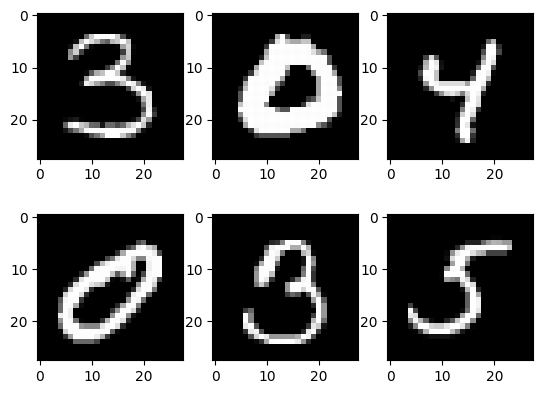

In [5]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                          transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                          transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [12]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)  # softmax will be in loss func
    
        return out

model = NeuralNet(input_size, hidden_size, num_classes)

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f"epoch {epoch + 1} / {num_epochs}, step {i+1} / {n_total_steps}, loss={loss.item()}")
            
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value & index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f"accuracy = {acc}")

epoch 1 / 2, step 100 / 600, loss=0.4377399682998657
epoch 1 / 2, step 200 / 600, loss=0.21925944089889526
epoch 1 / 2, step 300 / 600, loss=0.3644927144050598
epoch 1 / 2, step 400 / 600, loss=0.259533166885376
epoch 1 / 2, step 500 / 600, loss=0.3550701141357422
epoch 1 / 2, step 600 / 600, loss=0.1980101764202118
epoch 2 / 2, step 100 / 600, loss=0.13710418343544006
epoch 2 / 2, step 200 / 600, loss=0.11186003684997559
epoch 2 / 2, step 300 / 600, loss=0.10720031708478928
epoch 2 / 2, step 400 / 600, loss=0.1499468982219696
epoch 2 / 2, step 500 / 600, loss=0.30395081639289856
epoch 2 / 2, step 600 / 600, loss=0.06162792816758156
accuracy = 95.57833333333333


In [18]:
# CNN

num_epochs = 4
batch_size = 4
learning_rate = 0.001

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True,
                                            download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False,
                                            transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=False)
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse",
          "ship", "truck")

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = x.view(-1, 16*5*5) #flatten
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print(f"epoch [{epoch+1}/{num_epochs}], step [{i+1}/{n_total_steps}], loss: {loss.item()}")

print("training finised")

Files already downloaded and verified
epoch [1/4], step [2000/12500], loss: 2.304253101348877
epoch [1/4], step [4000/12500], loss: 2.283416271209717
epoch [1/4], step [6000/12500], loss: 2.3116536140441895
epoch [1/4], step [8000/12500], loss: 2.3332762718200684
epoch [1/4], step [10000/12500], loss: 2.235795497894287
epoch [1/4], step [12000/12500], loss: 2.2670185565948486
epoch [2/4], step [2000/12500], loss: 1.9421439170837402
epoch [2/4], step [4000/12500], loss: 1.843127727508545
epoch [2/4], step [6000/12500], loss: 2.53489351272583
epoch [2/4], step [8000/12500], loss: 1.8630787134170532
epoch [2/4], step [10000/12500], loss: 1.503590703010559
epoch [2/4], step [12000/12500], loss: 1.8765625953674316
epoch [3/4], step [2000/12500], loss: 1.0686606168746948
epoch [3/4], step [4000/12500], loss: 1.6661685705184937
epoch [3/4], step [6000/12500], loss: 1.9689804315567017
epoch [3/4], step [8000/12500], loss: 1.7867835760116577
epoch [3/4], step [10000/12500], loss: 2.406804084777

In [19]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predicted == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f"Accuracy of the network: {acc} %")

Accuracy of the network: 46.51 %
